# SVM Algorithm used in Social Media Ads

# Support Vector Machine(SVM) 
is a supervised machine learning algorithm used for both classification and regression. Though we say regression problems as well its best suited for classification. The objective of SVM algorithm is to find a hyperplane in an N-dimensional space that distinctly classifies the data points. The dimension of the hyperplane depends upon the number of features. If the number of input features is two, then the hyperplane is just a line. If the number of input features is three, then the hyperplane becomes a 2-D plane. It becomes difficult to imagine when the number of features exceeds three. 

Let’s consider two independent variables x1, x2 and one dependent variable which is either a blue circle or a red circle.

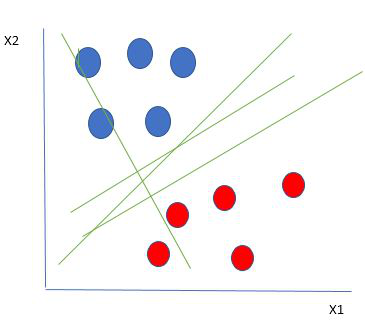

From the figure above its very clear that there are multiple lines (our hyperplane here is a line because we are considering only two input features x1, x2) that segregates our data points or does a classification between red and blue circles. So how do we choose the best line or in general the best hyperplane that segregates our data points.

# Selecting the best hyper-plane:

One reasonable choice as the best hyperplane is the one that represents the largest separation or margin between the two classes. 

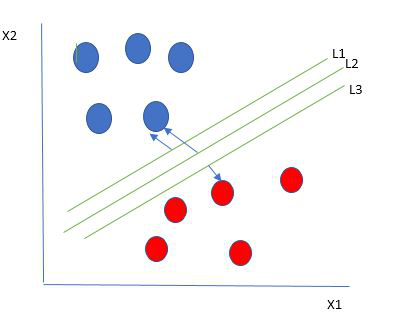

So we choose the hyperplane whose distance from it to the nearest data point on each side is maximized. If such a hyperplane exists it is known as the maximum-margin hyperplane/hard margin. So from the above figure, we choose L2.

Let’s consider a scenario like shown below

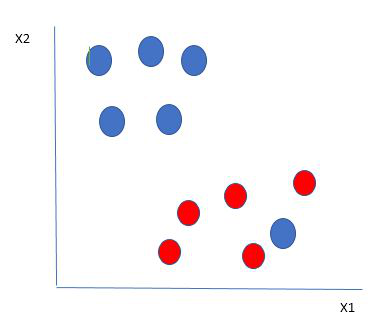


Here we have one blue ball in the boundary of the red ball. So how does SVM classify the data? It’s simple! The blue ball in the boundary of red ones is an outlier of blue balls. The SVM algorithm has the characteristics to ignore the outlier and finds the best hyperplane that maximizes the margin. SVM is robust to outliers.

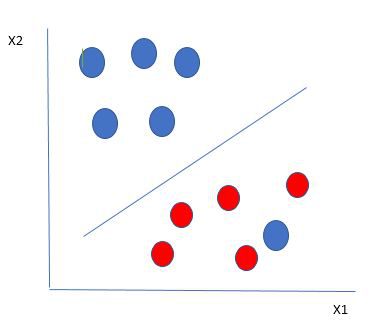

So in this type of data points what SVM does is, it finds maximum margin as done with previous data sets along with that it adds a penalty each time a point crosses the margin. So the margins in these type of cases are called soft margin. When there is a soft margin to the data set, the SVM tries to minimize (1/margin+∧(∑penalty)). Hinge loss is a commonly used penalty. If no violations no hinge loss.If violations hinge loss proportional to the distance of violation.

Till now, we were talking about linearly separable data(the group of blue balls and red balls are separable by a straight line/linear line). What to do if data are not linearly separable?

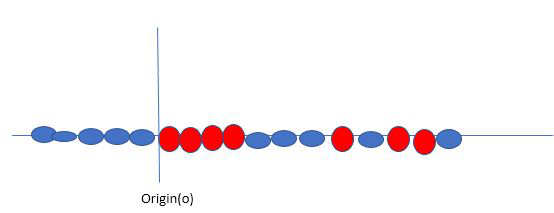

Say, our data is like shown in the figure above.SVM solves this by creating a new variable using a kernel. We call a point xi on the line and we create a new variable yi as a function of distance from origin o.so if we plot this we get something like as shown below

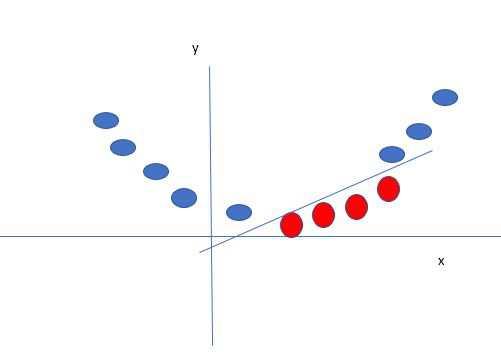

in this case, the new variable y is created as a function of distance from the origin. A non-linear function that creates a new variable is referred to as kernel.

# SVM Kernel:

The SVM kernel is a function that takes low dimensional input space and transforms it into higher-dimensional space, ie it converts not separable problem to separable problem. It is mostly useful in non-linear separation problems. Simply put the kernel, it does some extremely complex data transformations then finds out the process to separate the data based on the labels or outputs defined.

# Advantages of SVM:

1)Effective in high dimensional cases.

2)Its memory efficient as it uses a subset of training points in the decision function called support vectors.

3)Different kernel functions can be specified for the decision functions and its possible to specify custom kernels.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df=pd.read_csv("C:\\Users\\hp\\Desktop\\Santosh files\\Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.shape

(400, 5)

In [6]:
x=df.iloc[:,[2,3]]
y=df.iloc[:,4]
x,y

(     Age  EstimatedSalary
 0     19            19000
 1     35            20000
 2     26            43000
 3     27            57000
 4     19            76000
 ..   ...              ...
 395   46            41000
 396   51            23000
 397   50            20000
 398   36            33000
 399   49            36000
 
 [400 rows x 2 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 395    1
 396    1
 397    1
 398    0
 399    1
 Name: Purchased, Length: 400, dtype: int64)

In [7]:
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [8]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [9]:
import sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state =0)

In [10]:
print('x training data:',  x_train.shape)
print('x testing data :',  x_test.shape)


x training data: (280, 2)
x testing data : (120, 2)


In [11]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train= sc_x.fit_transform(x_train)
x_test= sc_x.transform(x_test)

In [12]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((280, 2), (120, 2), (280,), (120,))

# Test with different kernels ::

# kernel is linear

In [13]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

# predicting test results

In [14]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

# accuracy score

In [15]:
from sklearn import metrics
print('accuracy score: with linear kernel')

print(metrics.accuracy_score(y_test, y_pred))

accuracy score: with linear kernel
0.8666666666666667


# kernel= rbf

In [16]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(x_train, y_train)

SVC(random_state=0)

# predicting test results

In [17]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

# accuracy score

In [18]:
from sklearn import metrics
print('accuracy score: with rbf kernel')

print(metrics.accuracy_score(y_test, y_pred))

accuracy score: with rbf kernel
0.9083333333333333


# kernel with  rbf,gamma

low gamma : all points are considered,,,,,,,,
high gamma: near points are considered,,,,
C is regularization parameter

In [40]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', gamma=14, C=6, random_state=0)
classifier.fit(x_train, y_train)

SVC(C=6, gamma=14, random_state=0)

# predicting test results

In [41]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

# acccuracy score

In [42]:
from sklearn import metrics
print('accuracy score: with default rbf kernel and gamma,C')

print(metrics.accuracy_score(y_test, y_pred))

accuracy score: with default rbf kernel and gamma,C
0.9


# kernel is polynomial

In [43]:
svc=SVC(kernel='poly', degree=10) # svc algorithm
svc.fit(x_train, y_train)

SVC(degree=10, kernel='poly')

# predict test results

In [44]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

# accuracy score

In [46]:
from sklearn import metrics
print('accuracy score: with polynomial kernel and degree')

print(metrics.accuracy_score(y_test, y_pred))

accuracy score: with polynomial kernel and degree
0.9


# data visualization using matplotlib and seaborn

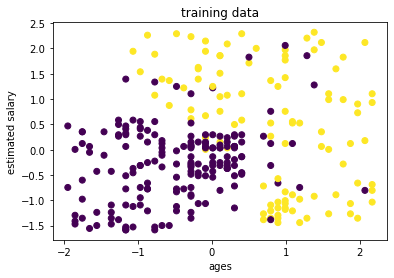

In [136]:
plt.scatter(x_train[:,0],x_train[:, 1], c=y_train)
plt.xlabel('ages')
plt.ylabel('estimated salary' )
plt.title('training data')

plt.show()

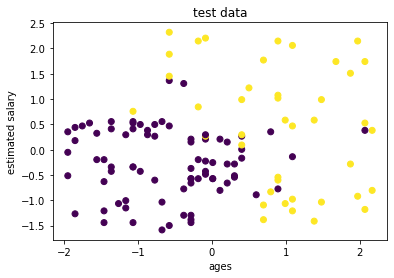

In [66]:
plt.scatter(x_test[:,0],x_test[:, 1], c=y_test)
plt.xlabel('ages')
plt.ylabel('estimated salary' )
plt.title('test data')
plt.show()

# hyperplane

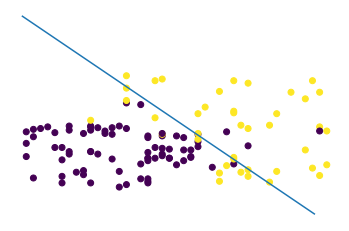

In [138]:
import matplotlib
from matplotlib import pyplot as plt
from sklearn.svm import SVC

classifier = SVC(kernel='linear', random_state=0)
classifier.fit(x_train, y_train)

y_pred=classifier.predict(x_test)

plt.scatter(x_test[:,0],x_test[:, 1], c=y_test)

# create hyper plane
w=classifier.coef_[0]
a= -w[0] / w[1]

x1=np.linspace(-2, 2)
y1= (a * x1) - (classifier.intercept_[0]) / w[1]

# plot hyper plane
plt.plot(x1, y1)
plt.axis('off'), plt.show();

# line is between 0 and 1
#violet are 0s , yellow are 1s, line is hyperplane